## 라이브러리 불러오기

In [1]:
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.model_selection import train_test_split

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from IPython.display import Image
import pandas as pd
import numpy as np
import pydotplus

import os
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

## 데이터  전처리

In [5]:
tennis = pd.read_csv('../data/playtennis.csv')

In [6]:
tennis.Outlook.value_counts()

Sunny       5
Rain        5
Overcast    4
Name: Outlook, dtype: int64

In [7]:
tennis.Outlook=tennis.Outlook.replace({'Sunny':0,'Rain':1,'Overcast':2})

In [138]:
tennis.Temperature.value_counts()

Mild    6
Hot     4
Cool    4
Name: Temperature, dtype: int64

In [8]:
tennis.Temperature=tennis.Temperature.replace({'Hot':1,'Mild':2,'Cool':3})

In [9]:
tennis.Humidity.value_counts()

High      7
Normal    7
Name: Humidity, dtype: int64

In [15]:
tennis.Humidity=tennis.Humidity.replace('High',1)
tennis.Humidity=tennis.Humidity.replace('Normal',2)

In [16]:
tennis.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,0,0,No
1,0,1,0,1,No
2,2,1,0,0,Yes
3,1,2,0,0,Yes
4,1,3,1,0,Yes


In [17]:
tennis.Wind.value_counts()

0    8
1    6
Name: Wind, dtype: int64

In [18]:
tennis.Wind=tennis.Wind.replace('Weak',1)
tennis.Wind=tennis.Wind.replace('Strong',2)

In [19]:
tennis.PlayTennis=tennis.PlayTennis.replace('No',1)
tennis.PlayTennis=tennis.PlayTennis.replace('Yes',2)


In [20]:
tennis.head(1)

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,0,0,1


In [21]:
tennis.head()

,Outlook,Temperature,Humidity,Wind,PlayTennis
0,0,1,0,0,1
1,0,1,0,1,1
2,2,1,0,0,2
3,1,2,0,0,2
4,1,3,1,0,2


## Decision Tree

In [22]:
## 파생변수, 타겟값 분리
X = np.array(pd.DataFrame(tennis,columns=['Outlook',"Temperature","Humidity","Wind"]))
y = np.array(pd.DataFrame(tennis,columns=['PlayTennis']))

In [23]:
## 학습용, 검증용 데이터셋 분리
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [24]:
## 데이터 분리 확인
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(10, 4) (10, 1)
(4, 4) (4, 1)


In [25]:
## decisiontree
dt_clf=DecisionTreeClassifier()

In [26]:
## decision tree 모델생성
dt_clf=dt_clf.fit(X_train,y_train)

In [27]:
## decision tree 예측
dt_predition = dt_clf.predict(X_test)

In [28]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test,dt_predition)
print("정확도: ",accuracy)

정확도:  0.75


In [29]:
feature_names = tennis.columns.tolist()
feature_names=feature_names[0:4]

In [30]:
target_name=np.array(['Play no','Play yes'])

In [31]:
dt_dot_data = tree.export_graphviz(dt_clf,out_file=None
                                  ,feature_names=feature_names,
                                  class_names=target_name,
                                  filled=True,rounded=True,
                                  special_characters=True)

In [32]:
dt_graph=pydotplus.graph_from_dot_data(dt_dot_data)
dt_graph.write_png('tree.png') #Tree 이미지를 저장

True

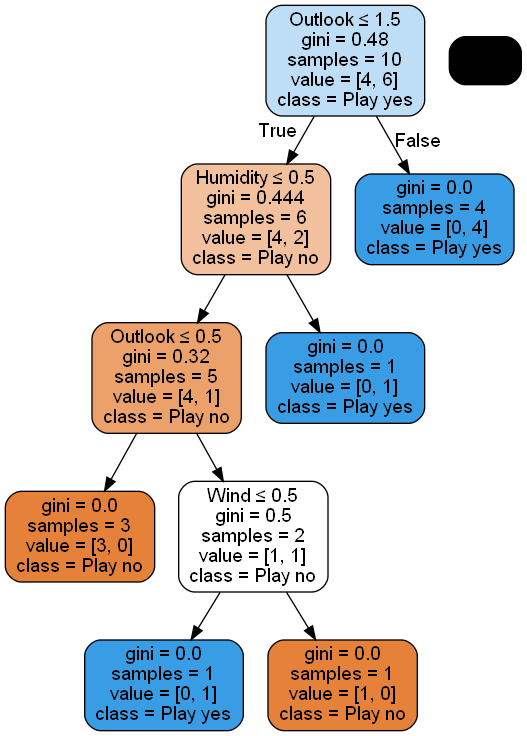

In [33]:
Image(dt_graph.create_png())